In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
X = np.array([ [   1,    1,  50,    1],
               [   1,    1,  70,    1],
               [   1,    2,  75,    2],
               [   1,    5,  60,    1],
               [   1,    3, 145,    2],
               [   1,    0,  80,    1],
               [   1,    5, 150,    3],
               [   1,   10, 200,    3],
               [   1,    1,  45,    1],
               [   1,    2, 100,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

NameError: name 'np' is not defined

In [ ]:
X

In [ ]:
y

In [ ]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [ ]:
X_st

In [ ]:
epsilon = 0.00001;

In [ ]:
def calc_logloss(y, y_pred):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
z = np.linspace(-10, 10, 101)

In [ ]:
probabilities = sigmoid(z)

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(z, probabilities)
plt.show()

In [ ]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)

        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
def eval_model_edu(X, y, iterations):
    learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
    for rate in learning_rates:
      eta = rate
      np.random.seed(42)
      W = np.random.randn(X.shape[1])
      n = X.shape[0]
      errors = []

      for i in range(iterations):
          z = np.dot(X, W)
          y_pred = sigmoid(z)
          err = calc_logloss(y, y_pred)
          errors.append(err)
          dQ = 1/n * X.T @ (y_pred - y)
          W -= eta * dQ
          if i % (iterations / 10) == 0:
              print(i, W, err)
      plt.plot(range(len(errors)), errors, label=f'eta={rate}')
    plt.xlabel('Iterations')
    plt.ylabel('Log loss')
    plt.title('Log loss over Iterations for different learning rates')
    plt.legend()
    plt.show()

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
500 [ 0.03982235 -0.72064774  0.8585723   1.32719824] 0.49098749514946327
1000 [-0.16731955 -0.75357199  0.95172595  1.4635263 ] 0.4764623107233352
1500 [-0.33588235 -0.79003576  0.98228783  1.60994271] 0.4660058881458373
2000 [-0.49197    -0.82105502  0.98635336  1.74725905] 0.45715487773019997
2500 [-0.64217604 -0.84600899  0.97571427  1.87329246] 0.4493121111978352
3000 [-0.78827285 -0.86584359  0.95540388  1.98934071] 0.4421846628745265
3500 [-0.93081573 -0.88160297  0.92822259  2.09708433] 0.43559915549768197
4000 [-1.07003706 -0.89415928  0.89602422  2.19797368] 0.42944618066185863
4500 [-1.20607612 -0.90420079  0.86014982  2.29316907] 0.42365350540190166
0 [ 0.49633477 -0.13971518  0.64766116  1.52246371] 1.1785958344356262
500 [ 0.36227303 -0.61296537  0.6357139   1.33157192] 0.5531388819143023
1000 [ 0.30073233 -0.70026449  0.66312517  1.28874272] 0.5201380455701675
1500 [ 0.25670353 -0.7153335   0.69622253

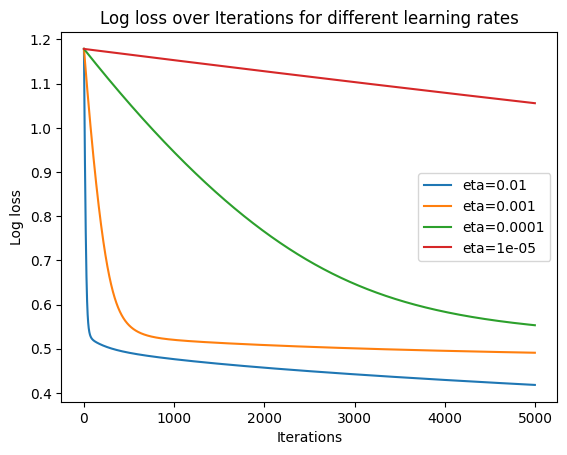

In [ ]:
eval_model_edu(X_st, y, iterations=5000)

In [ ]:
def predict_probabilities(W, X):
    z = np.dot(X, W)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [ ]:
W = eval_model(X_st, y, iterations=500, eta=0.01)

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
50 [ 0.36027236 -0.61870558  0.63600367  1.32917611] 0.5520011913232798
100 [ 0.29954562 -0.70184086  0.66393101  1.28809857] 0.5200176817937364
150 [ 0.25579198 -0.71579324  0.69711726  1.27995239] 0.5132514064065892
200 [ 0.21783205 -0.71711535  0.72830416  1.28039917] 0.5083938298746018
250 [ 0.18310418 -0.71643331  0.75649022  1.2842512 ] 0.504348220292456
300 [ 0.15081179 -0.71601562  0.78172777  1.29014996] 0.500908097886405
350 [ 0.1205791  -0.71626694  0.80427962  1.29762315] 0.49794267439739776
400 [ 0.09214433 -0.71718068  0.82443144  1.306414  ] 0.49535059743739646
450 [ 0.06528918 -0.71867134  0.84244939  1.31632795] 0.49305272027822244


In [ ]:
predicted_probabilities = predict_probabilities(W, X_st)
print(predicted_probabilities)

[0.45163622 0.53989947 0.7015744  0.05217937 0.79789693 0.7422205
 0.79371504 0.20253026 0.42982583 0.78538125]


In [ ]:
def predict_class(W, X, threshold):
    y_pred_proba = predict_probabilities(W, X)
    return (y_pred_proba >= threshold).astype(int)

In [ ]:
predicted_classes = predict_class(W, X_st, 0.5)
print(predicted_classes)

[0 1 1 0 1 1 1 0 0 1]


accuracy - доля правильных ответов

In [ ]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

In [ ]:
accuracy = calculate_accuracy(y, predicted_classes)
print(accuracy)

0.7


матрица ошибок


In [7]:
def calculate_confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])

In [8]:
confusion_matrix = calculate_confusion_matrix(y, predicted_classes)
print(confusion_matrix)

NameError: name 'y' is not defined

точность - доля истинных срабатываний от общего количества срабатываний

In [ ]:
def calculate_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    print(tp)
    fp = np.sum((y_true == 0) & (y_pred == 1))
    print(fp)
    return tp / (tp + fp) if (tp + fp) > 0 else 0

In [ ]:
precision = calculate_precision(y, predicted_classes)
print(precision)

0.6666666666666666


In [ ]:
def calculate_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

In [ ]:
recall = calculate_recall(y, predicted_classes)
print(recall)

0.8


In [ ]:
def calculate_f1_score(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [ ]:
f1_score = calculate_f1_score(y, predicted_classes)
print(f1_score)

0.7272727272727272
